
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

In [ ]:
Classification.
The model have to predict whether the student will pass or fail in the exam.  

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read student data
data= pd.read_csv(r'student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

Insights:
-- The data set contains 31 columns and 395 rows.
-- Data contains int and object types.
-- There is no missing values in the columns.

In [5]:
# Calculate number of students
len(data.axes[0])


395

In [6]:
# Calculate number of features
len(data.axes[1])


31

In [7]:
# Calculate passing students
df1=data[data['passed']=='yes']
passed=df1.passed.count()



In [8]:
# Calculate failing students
df1=data[data['passed']=='no']
failed=df1.passed.count()


In [9]:
# Calculate graduation rate
rate=(passed/(passed+failed))*100



In [10]:
# Print the results
print('Number of Students passed in the test is:\n', passed)
print('Number of Students failed in the test is:\n',failed)
print('Graduation rate is:\n', rate)

Number of Students passed in the test is:
 265
Number of Students failed in the test is:
 130
Graduation rate is:
 67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [ ]:
# Extract feature columns

In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [4]:
data.drop('passed', axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [ ]:
# Extract target column 'passed'

In [12]:
data[data.columns[30]]



0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [ ]:
# Separate the data into feature data and target data (X and y, respectively)

In [5]:
X=data.drop('passed', axis=1)
y = pd.DataFrame(data['passed'])


### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [14]:
X=pd.get_dummies(X)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [ ]:
# splitting the data into train and test


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.24)

In [22]:
# Show the results of the split


In [18]:
print('Number of points in X_train is:\n',X_train.shape)
print('Number of points in X_test is:\n',X_test.shape)
print('Number of points in y_train is:\n',y_train.shape)
print('Number of points in y_test is:\n',y_test.shape)

Number of points in X_train is:
 (300, 56)
Number of points in X_test is:
 (95, 56)
Number of points in y_train is:
 (300,)
Number of points in y_test is:
 (95,)


In [17]:
# creating a linear regression model
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(X_train, y_train)
predictions= model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
print('MSE is:', mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))


MSE is: 0.21892658875961052
Rsquared value is: 0.05913692211643551


In [19]:
# Min- Max Scaling
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
# creating a linear regression model after min max scaling
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:', mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.21891313187683684
Rsquared value is: 0.026896826179957922


In [20]:
# Standardisation
standardisation= preprocessing.StandardScaler()
X=standardisation.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:',mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))


MSE is: 0.21581305051159017
Rsquared value is: 0.0406771736162147


In [21]:
# Normalization
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:',mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.22806567358430282
Rsquared value is: -0.013787655868685356


Insights:
-- Mean squared error is almost same in all preprocessing steps. 
-- R squared value is decreased after each preprocessing steps.

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

Three models:
-- KNN
-- Support Vector Machine
-- Decision tree

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

#explaination

1. KNN
Advantages:
KNN is very easy to implement. 
KNN algorithm is h faster than other algorithms

Disadvantages:
DisadvanDoes not work well with large dataset: tages:
Need feature scaling:

2. Decision Tree
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level.
Advantages:
No preprocessing needed on data.
Decision trees can provide understandable explanation over the prediction.

Disadvantages:
Cha.ces for overfitting the model if we keep on building the tree to achieve high purity.
Prone to outliers.
 3. SVM

SVM algorithm create best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
Advantages:
SVM works relatively well when there is a clear margin of separation between classes.
SVM is more effective in high dimensional spaces.
Disadvantages:
SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
SVM algorithm is not suitable for large data sets.


In [23]:
# Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# fit model-1  on traning data 

In [24]:
acc_values= []
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

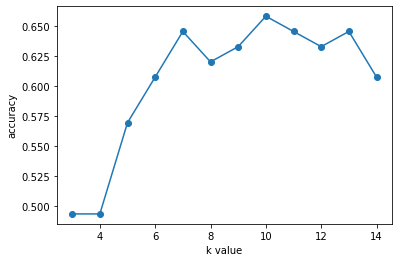

In [25]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
# predict on the test data 

In [27]:
acc_values= []
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [ ]:
# calculate the accuracy score

In [28]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6582278481012658


In [ ]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred= dt_model.predict(X_test)

In [ ]:
# calculate the accuracy score

In [30]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6835443037974683


In [ ]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [34]:
from sklearn.svm import SVC
# Linear SVM Classifier
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred=svm_linear.predict(X_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6835443037974683


In [35]:
# Polynomial SVM
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6329113924050633


In [37]:
# Radial SVM
svm_rad = SVC(kernel='rbf')
svm_rad.fit(X_train,y_train)
y_pred=svm_rad.predict(X_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6455696202531646


Insights:
-- Decision Tree Classifier and Linear SVM have high accuracy commpared to KNN for the data.
